# Linear Regression

In [1]:
# Set the plotting DPI settings to be a bit higher.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

## Single Feature Variable with Scikit-Learn Linear Regression

In [2]:
# API Doc:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # scikitlearn uses numpy arrays

data = pd.read_csv('LinRegData.csv') # Read in our data
data.head() # See the first few rows to understand the data

,X,Y
0,3.717656,2.969227
1,2.240286,2.674028
2,2.541955,3.532068
3,3.570501,3.636004
4,0.288653,2.125236


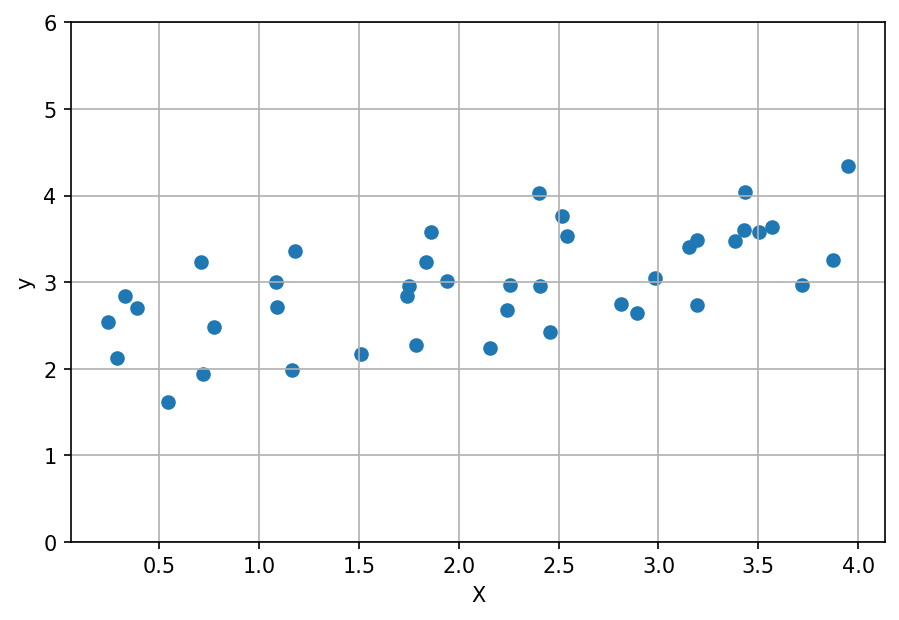

In [6]:
# Data is X and Y coordinates
X_ = data['X']
y_ = data['Y']
plt.scatter(X_, y_) # Plot 
plt.ylim([0,6])
plt.grid()
plt.xlabel('X')
plt.ylabel('y');

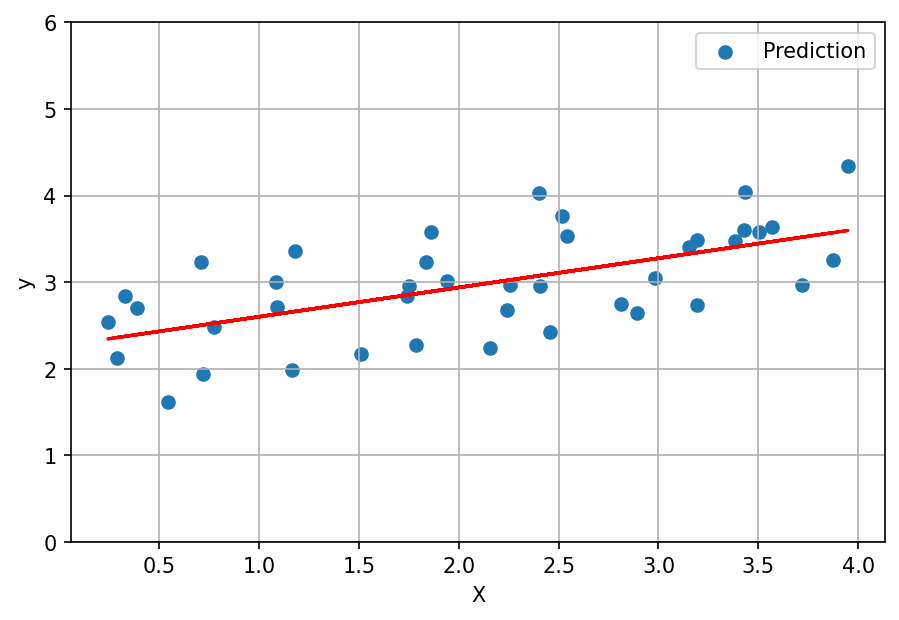

In [8]:
# Use scikitlearn to do linear regression
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()

x=X_.values.reshape(-1,1) # LinearRegressor object wants arguments as numpy objects
y=y_.values.reshape(-1,1)
linearRegressor.fit(x, y)
y_pred = linearRegressor.predict(x)
plt.scatter(X_, y_) # scatter plot, learning data
plt.plot(x, y_pred, 'red') # plot of linear regression prediction on top (red line)

#Plot formatting.
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.ylim([0,6]);
plt.legend(['Prediction'])

In [9]:
# Just try a single number
linearRegressor.predict([[3]])

array([[3.27684707]])

Root Mean Squared Error:

$MSE\ =\ \frac{1}{n}\sum_{i=1}^{n}\left({\hat{Y}}_i - Y_i\right)^2$

In [10]:
from sklearn.metrics import mean_squared_error # Sklearn library has this as a func for us.
mean_squared_error(y, y_pred)

0.23034812795839638

## Linear Regression Under the Hood

In [14]:
# Maky your own simple linear regression Gradient Descent
eta = 0.05  # Learning Rate 0.01
iterations = 100  # The number of iterations to perform 1e3
n = len(X_) # Number of elements 
beta0, beta1 = 0, 0 # start with random numbers

# Performing Gradient Descent
for i in range(iterations): 
    beta0 = beta0 - eta * (2/n) * sum(beta0 + beta1 * X_ - y_)
    beta1 = beta1 - eta * (2/n) * sum((beta0 + beta1 * X_ - y_) * X_)

print('Final values of Beta0 and Beta1 are:', beta0, beta1)

y_pred = beta0 + beta1 * X_ # Do the prediction

Final values of Beta0 and Beta1 are: 2.0228762355020855 0.4283872160417387


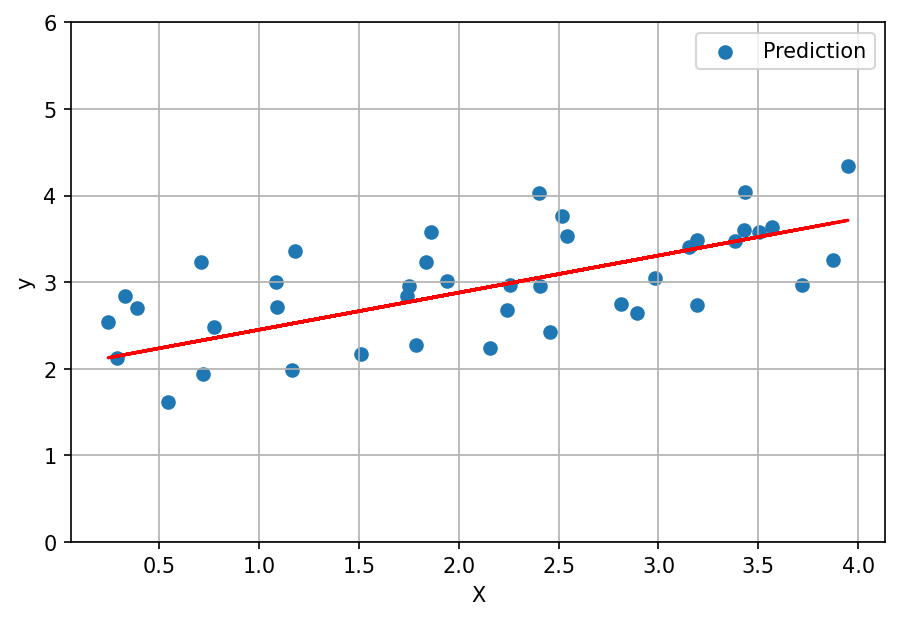

In [17]:
# Plotting
plt.scatter(X_, y) 
plt.plot(X_, y_pred, color='red')

# Formatting
plt.ylim([0,6])
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Prediction']);

In [18]:
mean_squared_error(y, y_pred)

0.24271700839794935

# Exercise 9 - Custom Linear Regression with 2 Feature Variables
Here we will take in 2 columns of stock fundamental data, as well as the past stock return, and try and predict returns

Some of the code is missing. Try and fix the code, replacing the ??? text.

In [10]:
data = pd.???_csv('Exercise_10_StockReturnData.csv') # Read in our data
data.head???) # Take a first look at the data with head

,Stock Performance,P/E,RoE
0,0.055388,10.875822,0.179792
1,0.112595,18.033607,0.143820
2,0.947340,-11.771037,-0.209845
3,0.032850,12.254908,5.000000
4,-0.015705,20.870461,0.040745


In [11]:
data.describe() # data seems OK

,Stock Performance,P/E,RoE
count,78.000000,78.000000,78.000000
mean,0.166818,27.350574,0.108781
std,0.399712,48.222197,0.865526
min,-0.767647,-179.701327,-5.000000
25%,-0.119285,13.976447,0.041304
50%,0.074066,18.933449,0.105154
75%,0.372113,35.779851,0.198886
max,1.722365,276.261734,5.000000


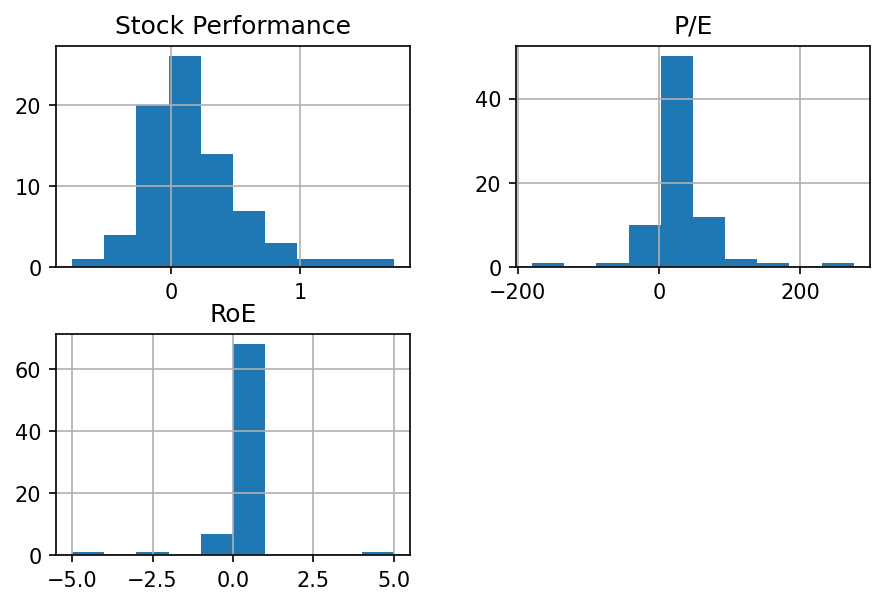

In [12]:
data.hist(); # histograms seem OK

In [13]:
y = data['Stock Performance'] # Split data into X and Y
X = ???.drop(columns='Stock Performance')

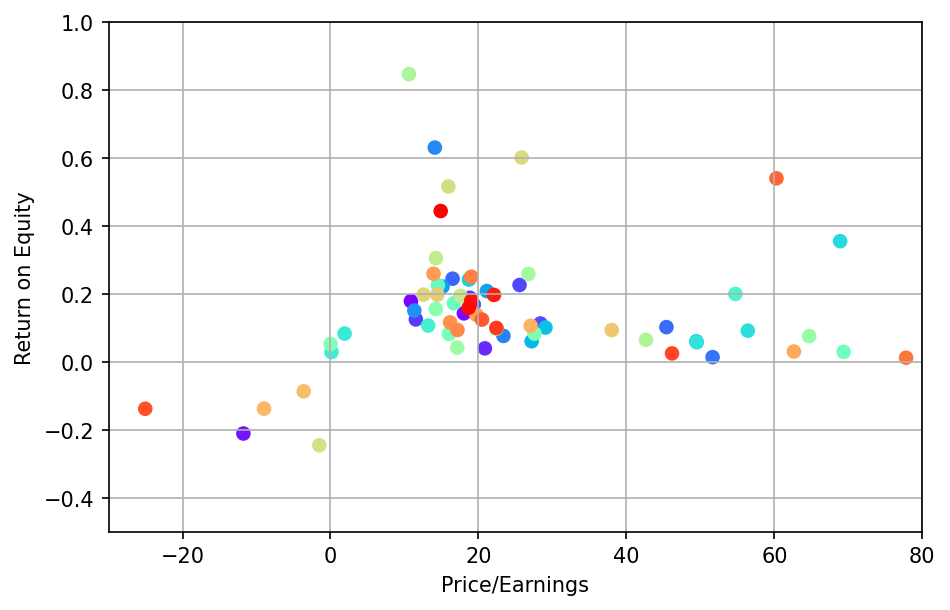

In [14]:
# Plotting scatter plot to see if anything obvious can be seen.
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.scatter(X['P/E'], X['RoE'], color=colors) # Plot
plt.xlabel('Price/Earnings')
plt.ylabel('Return on Equity')
plt.grid()
plt.xlim([-30,???])
plt.???lim([???,1]);
# Nothing easily to identify visually.

In [15]:
from sklearn.model_selection import train_test_split # Want to split test and train data for Machine Learning
X_train, X_test, y_train, y_test = train_te???(X, ???, test_size=0.2)

In [16]:
# Simple linear regression Gradient Descent
eta = 0.0002  # Learning Rate 0.0001 seems OK.
iterations = ???  # The number of iterations to perform, 1000 seems OK.
n = len(X_train) # Number of elements 
beta0, beta1, ??? = 0, 0, 0 # start with random numbers

# Manually setting X1 and X2. Could put regression into a function if you wish.
X1 = X_train['P/E']
X2 = X_train[???]

# Performing Gradient Descent to find Beta values.
for i in range(iterations): 
    beta0 = beta0 - eta * (2/n) * sum(beta0 + beta1*X1 + beta2*X2 - y_train)
    beta1 = beta1 - ??? * (2/n) * sum((beta0 + beta1*??? + beta2*X2 - ???) * X1)
    beta2 = beta2 - eta * (2/n) * sum((beta0 + beta1*X1 + beta2*??? - y_train) * X2)

y_pred = beta0 + beta1 * X1 + beta2 * X2 # Do the prediction
print('Final values of Beta0, Beta1 and Beta2 are:', beta0, beta1, beta2) # Make sure not crazy numbers

Final values of Beta0, Beta1 and Beta2 are: 0.06086352583296413 -0.0005661419356143158 0.02436458696378796


Model equation is:

$\hat{y} = \beta_{0}+ \beta_{1}X_{1}+ \beta_{2}X_{2}$

See book formulas for how $\beta_{0}, \beta_{1}, \beta_{2}$ values are found (code above)

In [17]:
from sklearn.metrics import mean_squared_error
print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, beta0 + beta1 * X_test['P/E'] + beta2 * X_test['RoE']))

train error 0.18115042825295832
test error 0.10795499987192322


In [18]:
def predictReturn(PE=X['P/E'].mean(), 
                  RoE=X['RoE'].mean(), 
                  beta0=beta0, beta1=beta1, beta2=beta2):
    '''
    Prediction from 2 variable linear regression for P/E and RoE predicting stock return.
    Default takes the mean P/E or RoE (return on equity) values.
    Model fitted parameters beta0, beta1, beta2 are needed.
    '''
    stock_return_pred = beta0 + beta1*PE + beta2*RoE
    return stock_return_pred

In [19]:
# The fit seems to work. Let's try a common-sense check to see if the algorithm is working.
# A stock with a ridiculously low P/E with a ridiculously high RoE should give us spectacular returns.
# Try P/E of 2 and a RoE of 100%
stock_return_pred = predictReturn(2, 1)
print('Predicted Stock Return P/E of 2 and RoE of 100% is:\n', 
      round(stock_return_pred*100,2),
      '%')

Predicted Stock Return P/E of 2 and RoE of 100% is:
 8.41 %


In [20]:
# 7% as a prediction kind of sucks, but it is at least positive.
# Try P/E of 100 and a RoE of 10%, this kind of stock should do badly.
stock_return_pred = predictReturn(???, 0.1, beta0, beta1, beta2)
print('Predicted Stock Return P/E of 100 and RoE of 10% is:\n', 
      round(stock_return_pred*100,2),
      '%')

Predicted Stock Return P/E of 100 and RoE of 10% is:
 0.67 %


In [21]:
'''
2% return is quite low for a stock return.
Bear in mind that we have less than 100 rows of data to work with. 

Our regression algorithm generally predicts things in the right direction, 
we expect a low P/E stock with high Return on Equity to perform better.

Also bear in mind that only beta0, 1 and 2 are changing, 
by their nature they will not capture many relationships in the data.

We'll use learning curves with Scikit-Learn linear regressors next.
''';

# Linear Regression Regularisation

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data=pd.read_csv('Exercise_10_stock_data_performance_fundamentals.csv', 
                 index_col=0)
data

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,Perf
3400,6.381478,0.204089,10.875822,1.955389,1.043914,507.500000,1.683476,0.179792,0.205403,0.746217,2.340092,0.489970,1.896559,0.315558,0.055388
12853,13.063094,0.320015,18.033607,2.593587,2.290410,23.015477,2.739353,0.143820,0.143781,0.619297,2.614733,1.013029,4.911931,0.512353,0.112595
11564,22.946430,0.049592,-11.771037,2.470096,0.154558,0.518199,2.304271,-0.209845,0.043381,6.343013,1.157654,0.384641,9.211404,0.057980,0.947340
6584,9.117308,0.124919,12.254908,100.000000,0.406767,-200.000000,1.989239,5.000000,0.115158,100.000000,1.003977,0.179304,7.571732,0.082257,0.032850
2810,-41.561149,0.418362,20.870461,0.850370,1.098445,39.277419,1.379839,0.040745,0.039916,3.682290,1.271570,1.117836,26.533528,1.000000,-0.015705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,83.505399,-0.509146,-179.701327,4.152762,1.604563,0.875874,0.739027,-0.023109,0.016279,4.303501,1.232434,0.453732,7.999567,0.488284,0.619817
2151,15.319187,0.223177,22.101117,4.375731,1.225972,29.056159,0.643573,0.197987,0.187116,1.095606,1.912737,0.125216,2.354439,0.434046,0.193358
7622,11.633947,0.578705,19.023766,3.430473,3.802736,-200.000000,4.495777,0.180326,0.265560,0.154412,7.476183,1.687236,5.452243,0.593472,0.192087
3578,11.929398,1.061325,18.686352,2.997386,1.498863,6.799893,1.222132,0.160405,0.159912,1.318212,1.758603,0.207343,8.240939,0.412899,-0.170243


In [20]:
#data = pd.read_csv('Exercise_9_stock_data_performance_fundamentals.csv', index_col=0) # Read in our data
#from pandas.plotting import scatter_matrix # If want scatter matrix
#scatter_matrix(data, alpha=0.2, figsize=(10, 10))

In [21]:
X=data.drop(columns='Perf')
y=data['Perf']
X.keys()

Index(['EV/EBIT', 'Op. In./(NWC+FA)', 'P/E', 'P/B', 'P/S',
       'Op. In./Interest Expense', 'Working Capital Ratio', 'RoE', 'ROCE',
       'Debt/Equity', 'Debt Ratio', 'Cash Ratio', 'Asset Turnover',
       'Gross Profit Margin'],
      dtype='object')

In [22]:
# Use scikitlearn to do linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

linearRegressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_train)

print('train error:', 
      mean_squared_error(y_train, y_pred))

print('test error:', 
      mean_squared_error(y_test, linearRegressor.predict(X_test)))


train error: 0.1292601776966043
test error: 3.894456377596657


In [23]:
# Learning curve for any Regressor
def learningCurve(myModel, X, y, randomState):
        
    testErr, trainErr, trainSize = [],[],[] # lists as output
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=randomState)
    trainSize = range(1, len(X))
    for i in trainSize:
        myModel.fit(X_train[:i], y_train[:i])
        y_pred = myModel.predict(X_train[:i])
        
        trainErr.append(mean_squared_error(y_train[:i], 
                                           y_pred))
        
        testErr.append(mean_squared_error(y_test, 
                                          myModel.predict(X_test)))
        
    return np.sqrt(testErr), np.sqrt(trainErr), trainSize



from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

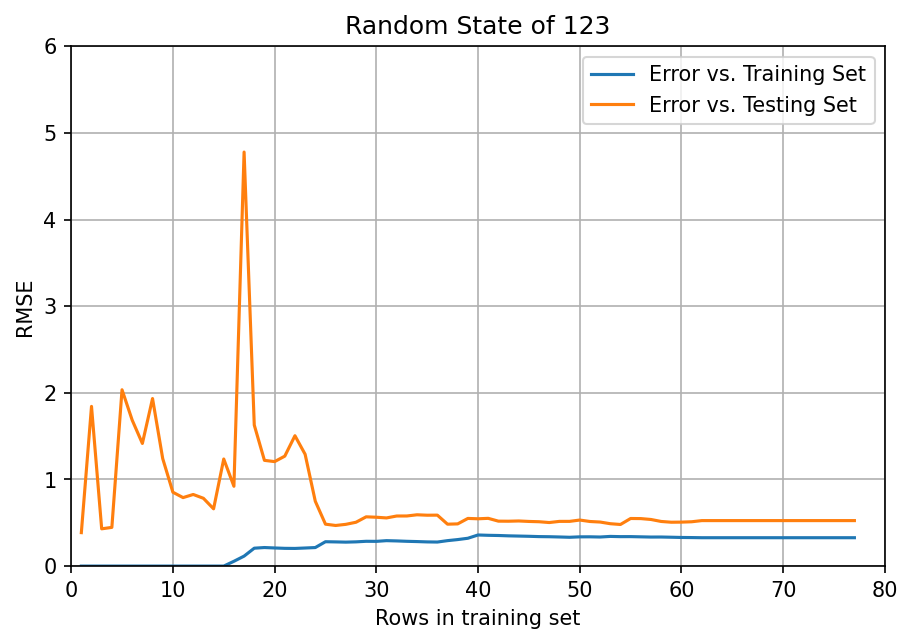

In [24]:
# Plotting the learning curve shows some interesting things.
randomState=123 # randomstate try 123 and 1234
testErr, trainErr, trainSize = learningCurve(linearRegressor, X, y, randomState) 
plt.plot(trainSize, trainErr, trainSize, testErr) # plot
plt.legend(['Error vs. Training Set', 'Error vs. Testing Set']) # Formatting
plt.grid()
plt.xlabel('Rows in training set')
plt.ylabel('RMSE')
plt.ylim([0,6])
plt.xlim([0,80])
plt.title('Random State of {}'.format(randomState));

In [25]:
from sklearn.linear_model import Ridge
ridgeRegressor = Ridge()
ridgeRegressor.fit(X_train, y_train)
y_pred = ridgeRegressor.predict(X_train)

print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, ridgeRegressor.predict(X_test)))


train error 0.13257687481350083
test error 0.7523443835840198


In [26]:
from sklearn.linear_model import Lasso
lassoRegressor = Lasso(alpha=0.1)
lassoRegressor.fit(X_train, y_train)
y_pred = lassoRegressor.predict(X_train)

print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, lassoRegressor.predict(X_test)))


train error 0.14636809861912523
test error 0.11575680599746765


In [27]:
from sklearn.linear_model import ElasticNet
eNetRegressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
eNetRegressor.fit(X_train, y_train)
y_pred = eNetRegressor.predict(X_train)

print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, eNetRegressor.predict(X_test)))


train error 0.14422073247670292
test error 0.11922290010175585


##### Plot learning curves for regularised linear models

In [28]:
# Plotting the learning curves for Linear Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

ridgeRegressor = Ridge()
lassoRegressor = Lasso(alpha=0.1)
eNetRegressor = ElasticNet(alpha=0.1, l1_ratio=0.5)

randomState=42 # randomstate
testErr1, trainErr1, trainSize1 = learningCurve(linearRegressor, 
                                                X, y, randomState)

testErr2, trainErr2, trainSize2 = learningCurve(ridgeRegressor, 
                                                X, y, randomState)

testErr3, trainErr3, trainSize3 = learningCurve(lassoRegressor, 
                                                X, y, randomState)

testErr4, trainErr4, trainSize4 = learningCurve(eNetRegressor, 
                                                X, y, randomState) 

C:\Users\Damon\anaconda3\envs\aiInvestor2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Damon\anaconda3\envs\aiInvestor2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


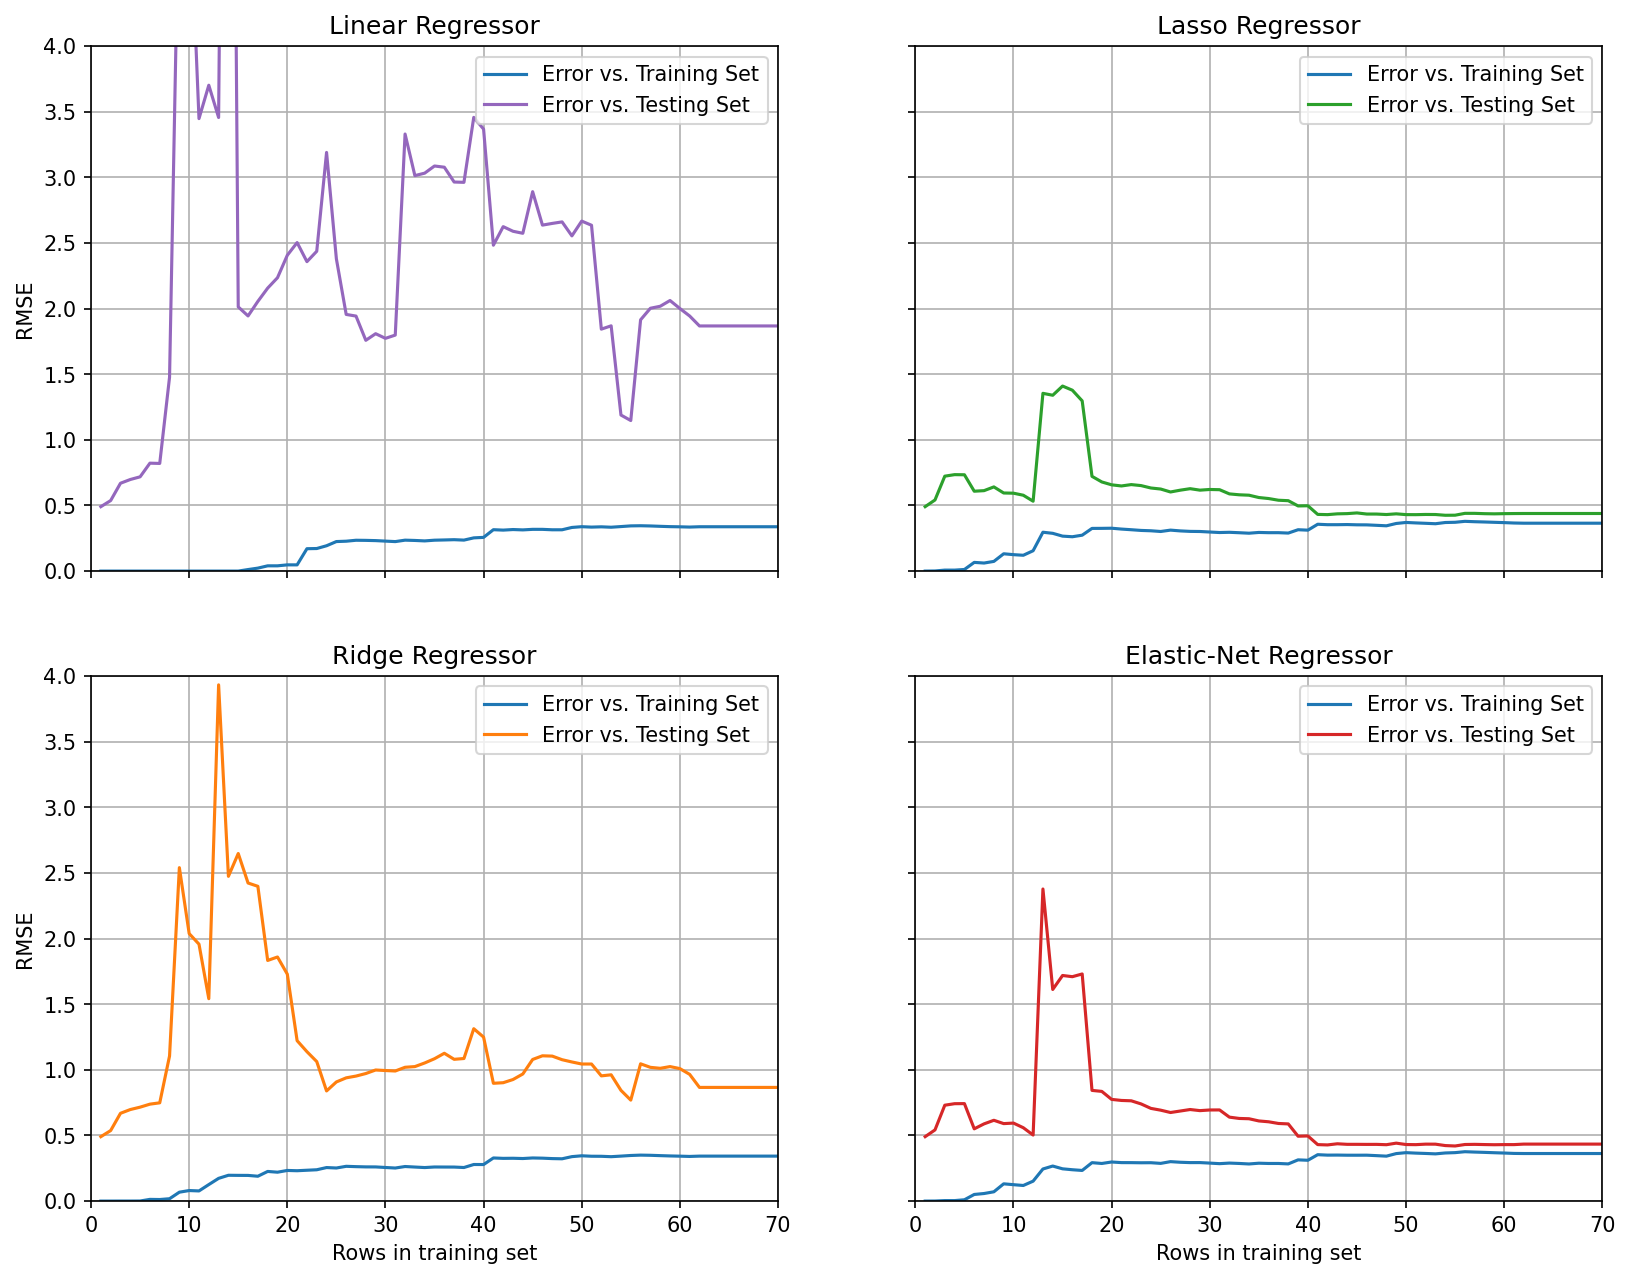

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(13,10))
axs[0, 0].plot(trainSize1, trainErr1, trainSize1, testErr1, 'tab:purple')
axs[0, 0].set_title("Linear Regressor")
axs[1, 0].plot(trainSize2, trainErr2, trainSize2, testErr2, 'tab:orange')
axs[1, 0].set_title("Ridge Regressor")
axs[0, 1].plot(trainSize3, trainErr3, trainSize3, testErr3, 'tab:green')
axs[0, 1].set_title("Lasso Regressor")
axs[1, 1].plot(trainSize4, trainErr4, trainSize4, testErr4, 'tab:red')
axs[1, 1].set_title("Elastic-Net Regressor")

for ax in axs.flat:
    ax.set(xlabel='Rows in training set', ylabel='RMSE', ylim=(0,4), xlim = (0,70))
    ax.grid()
    ax.legend(['Error vs. Training Set', 'Error vs. Testing Set'])
    
    # Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

| Regressor | RMSE vs. Training Data | RMSE vs. Testing Data |
| :- | :-: | :-: |
| Linear | 0.129 | 3.894
| Ridge | 0.133 | 0.752
| Lasso | 0.146 | 0.116
| Elastic-Net | 0.144 | 0.119

# Try the Scikitlearn Learning_Curve Function
Over multiple runs to see the statistics.

In [30]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

def plotMyLearningCurve(regressor):
    '''
    test
    '''
    train_sizes, train_scores, test_scores = learning_curve(regressor, 
                                                             X, y, 
                                                             train_sizes=np.linspace(.1, 1.0, 10), 
                                                             cv=5,
                                                             scoring=make_scorer(mean_squared_error))
    # Use RMSE
    train_scores=np.sqrt(train_scores)
    test_scores=np.sqrt(test_scores)

    # Means and std. devs.
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    #plot
    plt.plot(train_sizes, train_scores.mean(axis=1), '-x')
    plt.fill_between(train_sizes,
                     train_scores.mean(axis=1)-train_scores.std(axis=1),
                     train_scores.mean(axis=1)+train_scores.std(axis=1),
                     alpha=0.2)
    plt.plot(train_sizes, test_scores.mean(axis=1), '-o')
    plt.fill_between(train_sizes,
                     test_scores.mean(axis=1)-test_scores.std(axis=1),
                     test_scores.mean(axis=1)+test_scores.std(axis=1),
                     alpha=0.2)
    
    
    
    plt.legend(['Train', 'Test'])
    plt.ylabel('RMSE')
    plt.xlabel('Rows in Training Set')
    plt.ylim([-0.1,3])
    plt.grid()
    
    pass

C:\Users\Damon\anaconda3\envs\aiInvestor2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e-02, tolerance: 1.101e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Damon\anaconda3\envs\aiInvestor2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e-03, tolerance: 1.407e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Damon\anaconda3\envs\aiInvestor2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

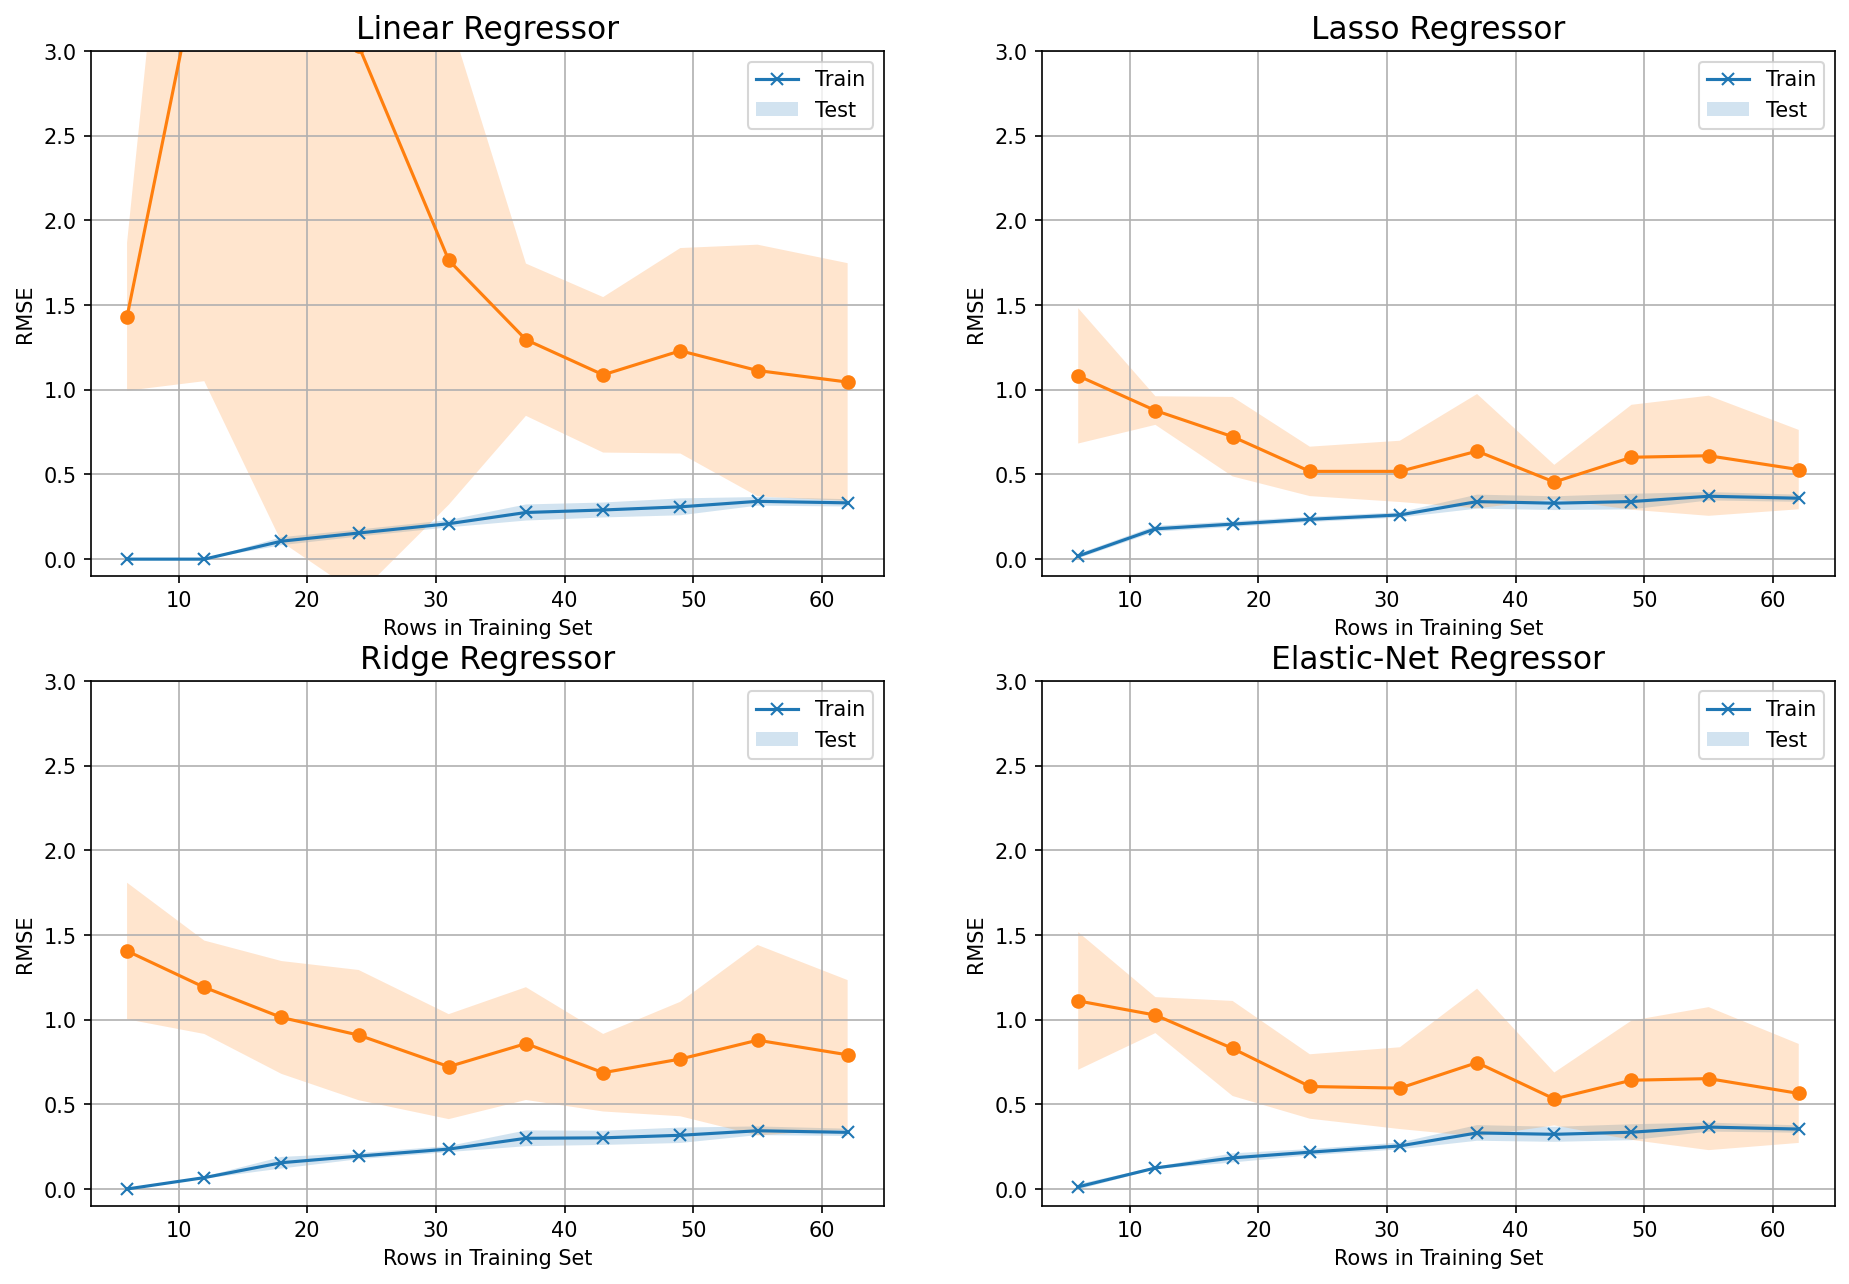

In [31]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plotMyLearningCurve(linearRegressor);
plt.title('Linear Regressor', fontsize=15)
plt.subplot(2,2,2)
plotMyLearningCurve(lassoRegressor);
plt.title('Lasso Regressor', fontsize=15)
plt.subplot(2,2,3)
plotMyLearningCurve(ridgeRegressor);
plt.title('Ridge Regressor', fontsize=15)
plt.subplot(2,2,4)
plotMyLearningCurve(eNetRegressor);
plt.title('Elastic-Net Regressor', fontsize=15);

# Try with Shufflesplit to see how variable it can be
Instead of K-fold splitting.
The results aren't good, but we know that the regressor is 'learning', also this is financial data, it's not going to be easy to find a relationship.

C:\Users\Damon\anaconda3\envs\aiInvestor2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.807e-03, tolerance: 3.560e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Damon\anaconda3\envs\aiInvestor2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.916e-02, tolerance: 4.046e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Damon\anaconda3\envs\aiInvestor2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

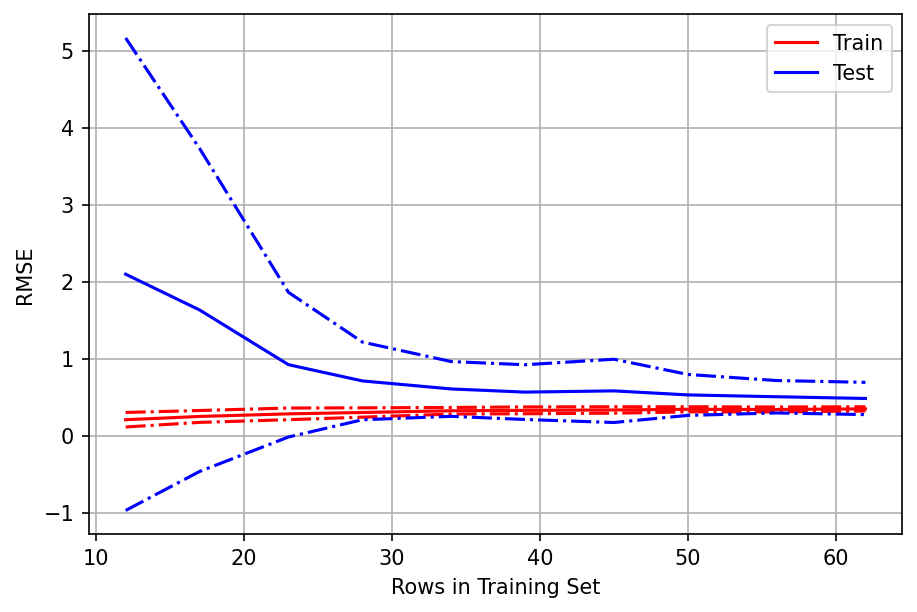

In [33]:
from sklearn.model_selection import ShuffleSplit

train_sizes, train_scores, test_scores = learning_curve(eNetRegressor, 
                                                         X, y, 
                                                         train_sizes=np.linspace(.2, 1.0, 10), 
                                                         cv=ShuffleSplit(n_splits=30, test_size=0.2, random_state=0),
                                                         scoring=make_scorer(mean_squared_error))

train_scores=np.sqrt(train_scores)
test_scores=np.sqrt(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'r-', train_sizes, test_scores_mean, 'b-')
plt.plot(train_sizes, train_scores_mean+train_scores_std,'r-.')
plt.plot(train_sizes, train_scores_mean-train_scores_std,'r-.')
plt.plot(train_sizes, test_scores_mean+test_scores_std,'b-.')
plt.plot(train_sizes, test_scores_mean-test_scores_std,'b-.')
plt.legend(['Train', 'Test'])
plt.ylabel('RMSE')
plt.xlabel('Rows in Training Set')
plt.grid()

# Check Stock Return Predictions

In [34]:
eNetRegressor = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X,y)

In [35]:
eNetRegressor.predict(X)

array([ 0.19804171,  0.19726925,  0.18303249, -0.2600265 ,  0.06397828,
        0.14066473,  0.37817383,  0.12761622,  0.22399648,  0.18121925,
        0.18214144,  0.10788129,  0.08973967,  0.1228562 ,  0.31189706,
        0.2038842 ,  0.24614236,  0.16412215,  0.02459869, -0.00792364,
        0.15106811,  0.1869355 ,  0.07779264,  0.19145224, -0.11544981,
        0.06384969,  0.35445613,  0.08123059,  0.37748352,  0.21814801,
        0.21339353,  0.15301348,  0.38778865, -0.01376316,  0.58046888,
        0.17821767,  0.06041354,  0.14540249,  0.24083633,  0.24793878,
        0.20096346,  0.16114292,  0.08406965,  0.16725075,  0.14682429,
        0.1187472 ,  0.13710239, -0.07141543,  0.18307573,  0.22006582,
        0.17525196,  0.15528005,  0.24438588,  0.16189105,  0.23473249,
        0.18333097,  0.15916382,  0.49133013,  0.14405395, -0.321056  ,
        0.17121568,  0.18167111,  0.18626351,  0.14338514,  0.30709918,
        0.04404722, -0.1879151 ,  0.21572721,  0.12705744,  0.23